## Итоговая работа


Поздравляю вас, теперь вы вооружены знаниями по предобработке данных, и пора применить их на интересном кейсе.

Представлены данные такси, по которым мы должны предсказать возьмёт ли таксист заказ или нет(driver_response).

Принципы вы знаете, чек-лист аналогичен лабораторной работе.

Чек-лист:
1. Загрузите датасет taxi.csv.
2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.
4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.
7. Разделите выборку на обучаемую и тестовую.
8. Обучите модель. Напишите в markdown свои наблюдения по полученным результатам. Хорошие результаты дают классификаторы RandomForest и XGBoost

Если возникнут затруднения, то смотрите на материал практических занятий. Данного там должно хватить для выполнения всех пунктов. Желаю успеха!

In [76]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt

In [77]:
df = pd.read_csv('/Users/marinababanina/Desktop/Documents/Course/Netology/Feature engineering/Итоговое задание/taxi.csv', sep=',')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   offer_gk                100000 non-null  int64  
 1   weekday_key             100000 non-null  int64  
 2   hour_key                100000 non-null  int64  
 3   driver_gk               100000 non-null  int64  
 4   order_gk                100000 non-null  int64  
 5   driver_latitude         100000 non-null  float64
 6   driver_longitude        100000 non-null  float64
 7   origin_order_latitude   100000 non-null  float64
 8   origin_order_longitude  100000 non-null  float64
 9   distance_km             100000 non-null  float64
 10  duration_min            100000 non-null  float64
 11  offer_class_group       100000 non-null  object 
 12  ride_type_desc          100000 non-null  object 
 13  driver_response         100000 non-null  int64  
dtypes: float64(6), int64(

In [79]:
df.describe()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,driver_response
count,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,5.662189e+05,3.159860,13.827790,3446.376360,460867.01291,55.700824,37.492292,55.772440,37.541637,18.393518,23.134841,0.492480
std,3.259360e+05,2.054222,7.306496,2038.738677,266064.98953,2.135903,1.454640,0.665985,0.467758,41.129296,33.890105,0.499946
min,4.000000e+00,0.000000,0.000000,14.000000,18.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2.855552e+05,1.000000,8.000000,1421.000000,229178.50000,55.708651,37.413497,55.708032,37.407117,-1.000000,-1.000000,0.000000
50%,5.656715e+05,3.000000,16.000000,3506.500000,462420.00000,55.772904,37.533664,55.772561,37.532537,10.411500,19.700000,0.000000
75%,8.487198e+05,5.000000,20.000000,5242.000000,690894.00000,55.960667,37.624113,55.962000,37.624358,30.665250,37.867000,1.000000
max,1.130355e+06,6.000000,23.000000,6806.000000,920344.00000,56.174097,38.280547,56.311121,38.243608,5234.283000,3958.283000,1.000000


In [80]:
df.shape

(100000, 14)

In [81]:
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1


In [82]:
len(df.offer_gk.unique())

100000

In [83]:
len(df.driver_gk.unique())

439

In [84]:
len(df.order_gk.unique())

81435

In [85]:
df.offer_class_group.unique()

array(['Economy', 'Standard', 'XL', 'Kids', 'Delivery', 'Test', 'Premium',
       'VIP', 'VIP+'], dtype=object)

In [86]:
df.ride_type_desc.unique()

array(['private', 'business', 'affiliate', 'SMB'], dtype=object)

In [87]:
df.loc[df.duration_min < 0].shape

(26207, 14)

In [88]:
df_1 = df.loc[df.duration_min < 0]
df_1.duration_min.unique()

array([-1.])

In [89]:
df_1.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.0,-1.0,Economy,private,0
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.0,-1.0,Economy,private,1
6,103326,2,11,6080,615584,55.753508,37.663742,55.757251,37.659064,-1.0,-1.0,Standard,business,1
19,533917,5,8,6080,596531,55.913718,37.401395,55.921554,37.403505,-1.0,-1.0,Standard,business,0
21,123897,4,12,6080,185909,55.766763,37.607275,55.772388,37.606330,-1.0,-1.0,Standard,business,0


In [90]:
df_2 = df.loc[df.distance_km < 0]
df_2.duration_min.unique()

array([-1.])

In [91]:
df_2.shape

(26207, 14)

In [92]:
df_1 == df_2

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True,True
6,True,True,True,True,True,True,True,True,True,True,True,True,True,True
19,True,True,True,True,True,True,True,True,True,True,True,True,True,True
21,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,True,True,True,True,True,True,True,True,True,True,True,True,True,True
99981,True,True,True,True,True,True,True,True,True,True,True,True,True,True
99987,True,True,True,True,True,True,True,True,True,True,True,True,True,True
99991,True,True,True,True,True,True,True,True,True,True,True,True,True,True


In [93]:
df.loc[df.offer_class_group == 'Test']

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response
12092,849177,5,20,3763,83260,55.820917,37.650258,55.827038,37.660981,-1.0,-1.0,Test,SMB,0
31035,1122239,3,23,6290,493264,55.959273,37.415073,55.962322,37.407117,-1.0,-1.0,Test,SMB,0
43940,897797,5,20,591,83260,55.821477,37.611275,55.827038,37.660981,-1.0,-1.0,Test,SMB,1
54657,954625,1,18,172,203179,55.823113,37.508883,55.829178,37.513307,-1.0,-1.0,Test,SMB,1
65028,1039723,1,15,1916,357476,55.881810,37.654255,55.872580,37.668403,-1.0,-1.0,Test,SMB,1
82848,990065,2,14,3371,325838,55.775556,37.582864,55.773730,37.591352,-1.0,-1.0,Test,SMB,1
95758,159224,5,17,1126,392645,55.761183,37.657616,55.757251,37.659064,-1.0,-1.0,Test,SMB,1
97311,1060685,3,23,6302,493264,55.964894,37.413532,55.962322,37.407117,-1.0,-1.0,Test,SMB,1


In [94]:
df.weekday_key.unique()

array([5, 6, 2, 4, 3, 1, 0])

In [95]:
df.hour_key.unique()

array([20, 14,  6, 16, 15, 11,  7, 10, 12,  8,  9, 21, 17, 23, 13, 18,  5,
       19, 22,  0,  2,  3,  1,  4])

In [96]:
len(df.order_gk.unique())

81435

### 1. Загрузите датасет taxi.csv.
### 2. Посмотрите на данные. Отобразите общую информацию по признакам (вспомните о describe и info). Напишите в markdown свои наблюдения.
### 3. Выявите пропуски, а также возможные причины их возникновения. Решите, что следует сделать с ними. Напишите в markdown свои наблюдения.

Предположительное значение признаков:  
1. offer_gk - номер заказа
2. weekday_key - номер дня недели
3. hour_key - время
4. driver_gk - номер такси
5. order_gk - номер заказа
6. driver_latitude - широта нахождения такси
7. driver_longitude - долгота нахождения такси
8. origin_order_latitude - широта нахождения заказа
9. origin_order_longitude - долгота нахождения заказа
10. distance_km - дистанция поездки
11. duration_min - время поездки, мин
12. offer_class_group - класс заказа
13. ride_type_desc - тип заказа
14. driver_response - наличие отклика

### Изучая данные можно сделать следующие выводы:
1) Пропусков нет, вместо них в признаках distance_km, duration_min стоит -1  
2) offer_gk нам никакой информации не даст  
3) weekday_key - интересный для нас признак, без явных проблем  
4) hour_key - интересный для нас признак, без явных проблем  
5) driver_gk - может пригодится, разные водители ведут себя по-разному. Попробую посмотреть точность с ним и без него, не уверена, так как количество уникальных значений довольно большое  
6) order_gk - может оказать влияние, один заказ может предлагаться нескольким такси  
7) driver_latitude, driver_longitude, origin_order_latitude, origin_order_longitude надо преобразовать в расстояние между заказчиком и такси и удалить  
8) distance_km, duration_min - два признака, которые должны иметь сильную корреляцию, так как один получается из другого. Имеется 26207 значений, когда точка прибытия неизвестна. Значений много, имеет смысл выделить их в отдельный признак, а отрицательные значения исходника заменить средними
9) offer_class_group - категориальный признак, можно преобразовать в числовой. Исходя из количества данных класс Test надо удалить, VIP и VIP+ объединить 
10) ride_type_desc - категориальный признак, можно преобразовать в числовой, affiliate и SMB и business лучше объединить,   
11) driver_response - признак без особенностей  
12) в данных есть выбросы судя по разбросам между значениями  


### 4. Оцените зависимости переменных между собой. Используйте корреляции. Будет хорошо, если воспользуетесь profile_report. Напишите в markdown свои наблюдения.
### 5. Определите стратегию преобразования категориальных признаков (т.е. как их сделать адекватными для моделей).
### 6. Найдите признаки, которые можно разделить на другие, или преобразовать в другой тип данных. Удалите лишние, при необходимости.

In [98]:
from geopy import distance

def dist(row):    
    return distance.distance(
        (row.driver_latitude, row.driver_longitude), 
        (row.origin_order_latitude, row.origin_order_longitude)).km

df['distance'] = df.apply(dist, axis=1)
df.head()

,offer_gk,weekday_key,hour_key,driver_gk,order_gk,driver_latitude,driver_longitude,origin_order_latitude,origin_order_longitude,distance_km,duration_min,offer_class_group,ride_type_desc,driver_response,distance
0,1105373,5,20,6080,174182,55.818842,37.334562,55.814567,37.355010,-1.000,-1.000,Economy,private,0,1.367355
1,759733,5,14,6080,358774,55.805342,37.515023,55.819329,37.466398,18.802,25.217,Standard,private,1,3.423260
2,416977,6,14,6080,866260,55.813978,37.347688,55.814827,37.354074,6.747,9.800,Economy,private,0,0.411356
3,889660,2,6,6080,163522,55.745922,37.421748,55.743469,37.431130,-1.000,-1.000,Economy,private,1,0.649440
4,1120055,4,16,6080,506710,55.803578,37.521602,55.812559,37.527407,12.383,19.250,Economy,private,1,1.064116


In [99]:
orders = df.groupby(by='order_gk').offer_gk.count()
df.loc[:,'offers'] = df.loc[:, 'order_gk'].apply(lambda x: orders.loc[x])

In [100]:
df.drop(['order_gk','duration_min', 'offer_gk', 'driver_gk', 'driver_latitude', 'driver_longitude', 'origin_order_latitude', 'origin_order_longitude'], axis=1, inplace=True)

In [101]:
df.head()

,weekday_key,hour_key,distance_km,offer_class_group,ride_type_desc,driver_response,distance,offers
0,5,20,-1.000,Economy,private,0,1.367355,2
1,5,14,18.802,Standard,private,1,3.423260,1
2,6,14,6.747,Economy,private,0,0.411356,1
3,2,6,-1.000,Economy,private,1,0.649440,1
4,4,16,12.383,Economy,private,1,1.064116,1


In [102]:
df = df.loc[df.offer_class_group != 'Test']

In [103]:
df.loc[df.ride_type_desc.isin(['affiliate', 'SMB', 'business']), 'ride_type_desc'] = 'business'
df.ride_type_desc.value_counts()

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


private     91207
business     8785
Name: ride_type_desc, dtype: int64

In [104]:
df.loc[df.offer_class_group.isin(['VIP', 'Kids', 'VIP+', 'XL', 'Delivery']), 'offer_class_group'] = 'other_offer_class_group'
df.offer_class_group.value_counts()

Economy                    48335
Standard                   47288
other_offer_class_group     2596
Premium                     1773
Name: offer_class_group, dtype: int64

In [105]:
df['distance_subs'] = df.distance_km
df.loc[df.distance_subs != -1, 'distance_subs'] = 0
df.loc[df.distance_subs == -1, 'distance_subs'] = 1
df.loc[df.distance_km == -1, 'distance_km'] = df.distance_km.mean()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [106]:
df = df.loc[df.distance_km <= df.distance_km.quantile(0.995)]

In [107]:
df.loc[df.offer_class_group.isin(['Economy']), 'offer_class_group'] = 1
df.loc[df.offer_class_group.isin(['Standard']), 'offer_class_group'] = 2
df.loc[df.offer_class_group.isin(['other_offer_class_group']), 'offer_class_group'] = 3
df.loc[df.offer_class_group.isin(['Premium']), 'offer_class_group'] = 4

In [108]:
df.loc[df.ride_type_desc.isin(['private']), 'ride_type_desc'] = 1
df.loc[df.ride_type_desc.isin(['business']), 'ride_type_desc'] = 2

In [109]:
df.offer_class_group = df.offer_class_group.apply(lambda x: int(x))
df.ride_type_desc = df.ride_type_desc.apply(lambda x: int(x))

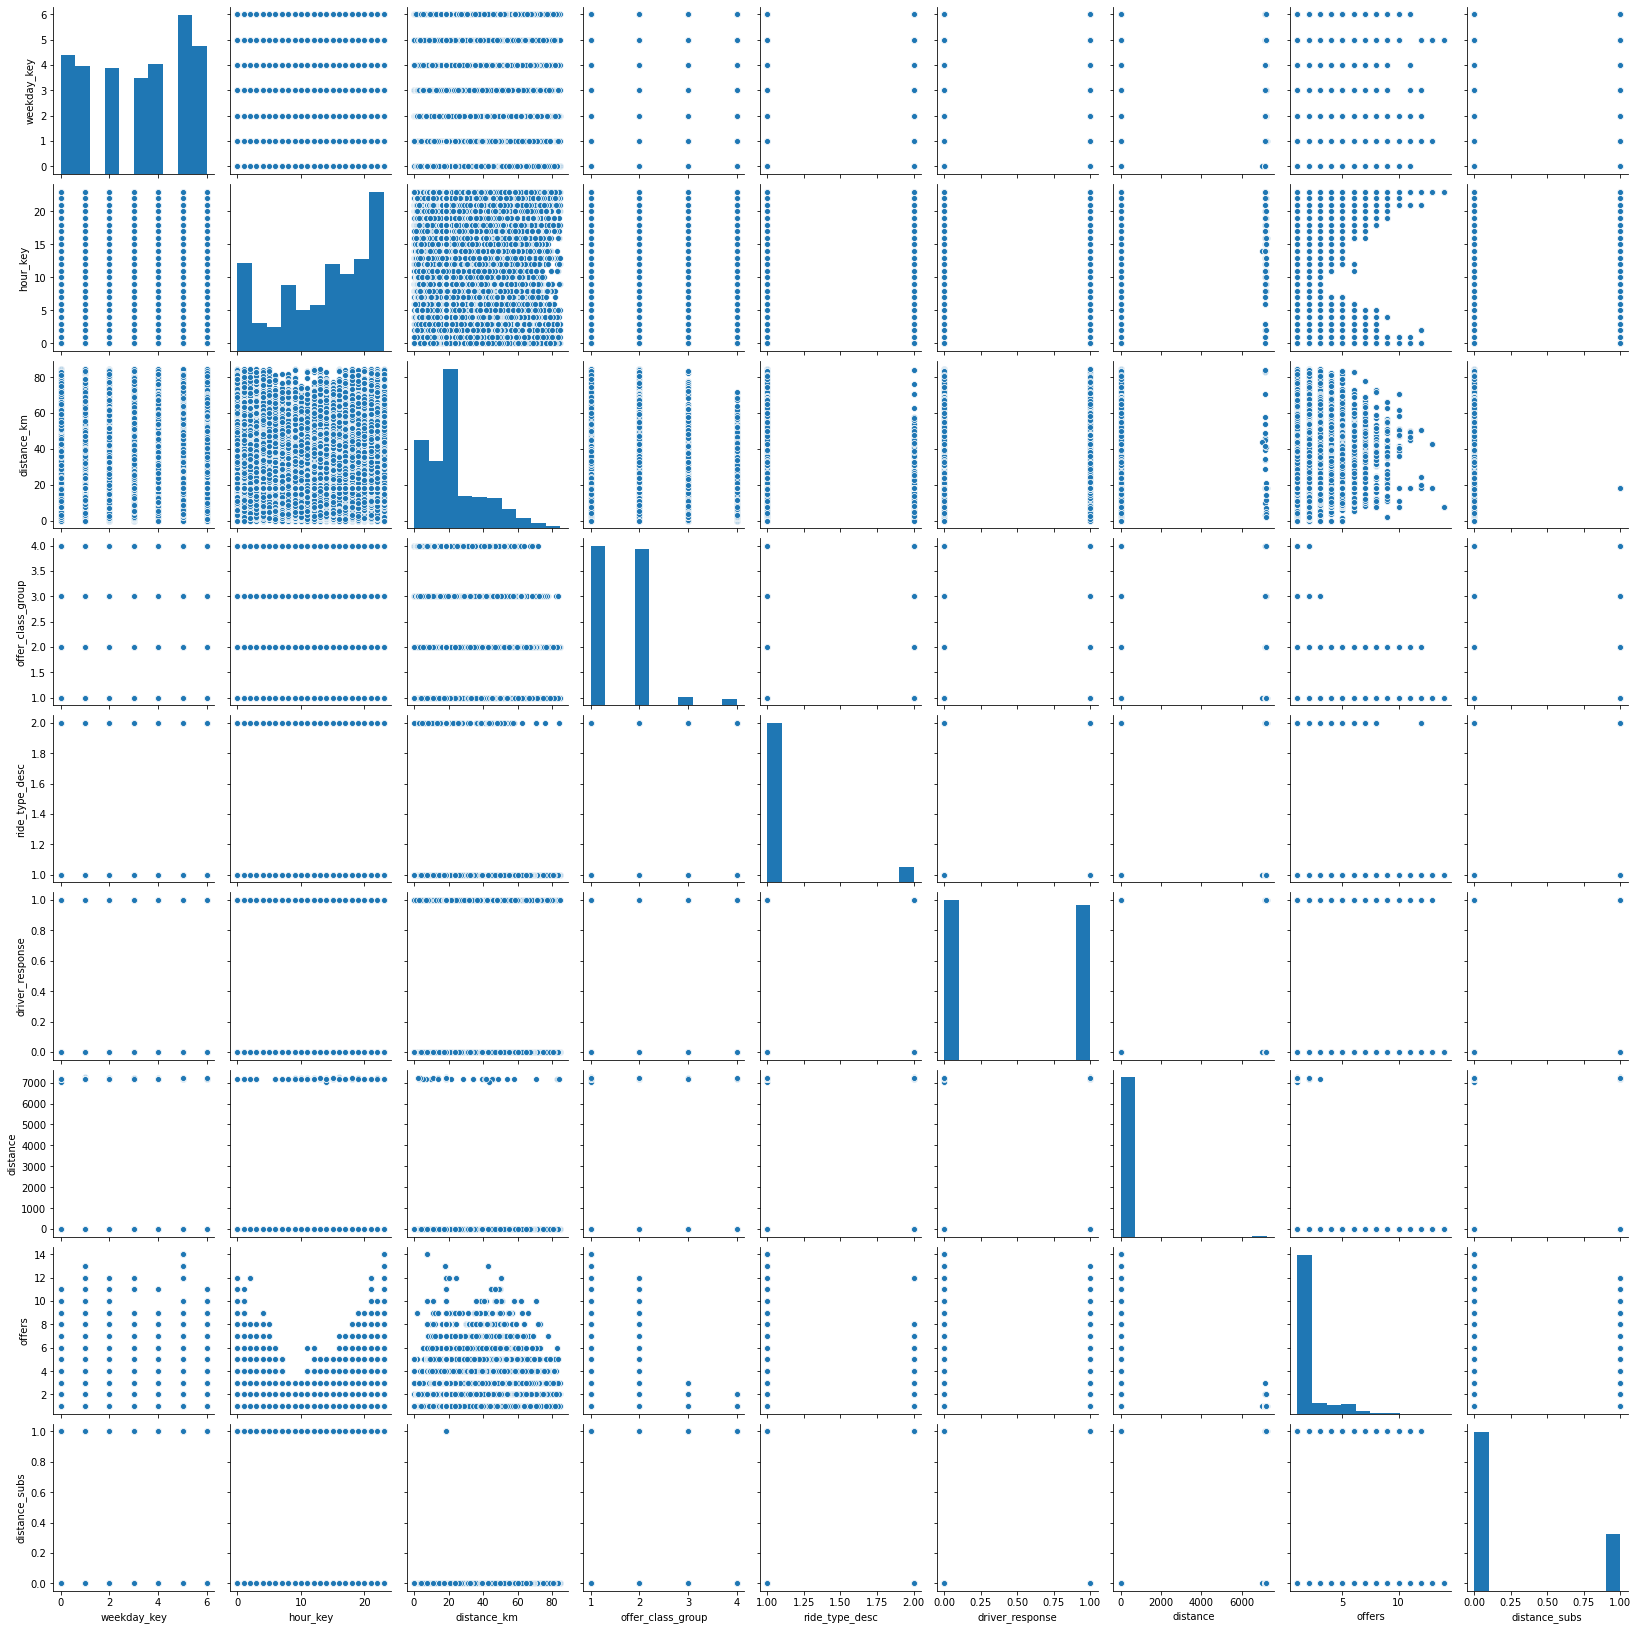

In [111]:
import seaborn as sns
sns.pairplot(df)

In [112]:
y = df.driver_response

In [113]:
df.drop(['driver_response'], axis=1, inplace=True)

In [114]:
# нормализируем данные
from sklearn.preprocessing import MinMaxScaler

min_max = MinMaxScaler()
new_dist = min_max.fit_transform(df)
df = pd.DataFrame(new_dist, columns=df.columns)

<AxesSubplot:>

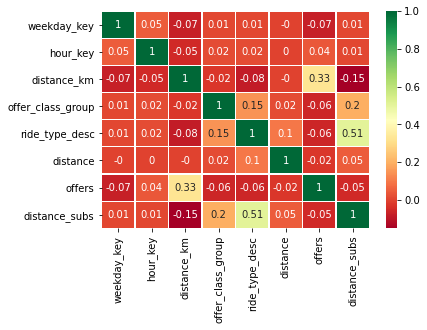

In [115]:
corr = np.round_(df.corr(), decimals=2)
sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2)

### 7. Разделение выборки на обучаемую и тестовую

In [116]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(df, y, test_size=0.2, random_state=13)

### 8. Обучение модели

              precision    recall  f1-score   support

           0       0.75      0.71      0.73     10103
           1       0.72      0.76      0.74      9796

    accuracy                           0.73     19899
   macro avg       0.73      0.73      0.73     19899
weighted avg       0.73      0.73      0.73     19899

Модель "рандомных деревьев" дала точность предсказания порядка 0.7325996281220162.


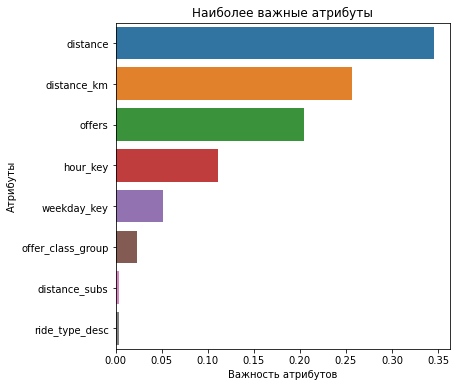

In [117]:
from sklearn.ensemble import RandomForestClassifier

# создание модели деревья решений
#  100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучение модели
model.fit(x_train, y_train)

# расчет качества модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

In [118]:
df.drop(['distance_subs', 'ride_type_desc'], axis=1, inplace=True)

In [119]:
x_train, x_test, y_train,y_test = train_test_split(df, y, test_size=0.2, random_state=13)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# создание модели деревья решений
#  100 деревьев в качестве параметра
model=RandomForestClassifier(n_estimators=100)

# обучение модели
model.fit(x_train, y_train)

# расчет качества модели - classification report:
from sklearn.metrics import classification_report

model_pred = model.predict(x_test)

print(classification_report(y_test, model_pred))

print(f'Модель "рандомных деревьев" дала точность предсказания порядка {model.score(x_test, y_test)}.')

# Наиболее важные атрибуты для модели Random Forest:
headers = list(x_train.columns.values)

feature_imp = pd.Series(model.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(6, 6))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.show()

### Вывод: модель предсказывает решение водителя такси с вероятностью порядка 73%